In [0]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from IPython.display import Image

In [0]:
uploaded = files.upload()

Saving 1_layer.png to 1_layer (2).png
Saving 1_neuron.png to 1_neuron (3).png
Saving 2_layer.png to 2_layer (2).png
Saving forward_backward.png to forward_backward (4).png
Saving full.png to full (1).png
Saving iris.csv to iris (1).csv
Saving nn_form.png to nn_form (3).png
Saving sigmoid.png to sigmoid (2).png


## Часть 1. Что такое нейронная сеть



$X = (x_1, x_2, \ldots, x_n)$ -- входные данные
    
$Y = (f(x_1), f(x_2), \ldots, f(x_n))$ -- ground truth, наблюдаемые ответы, где  f -- целевая зависимость, ее значения известны нам на множестве входных данных.
    
Мы хотим найти  аппроксимацию $f$, назовем ее $\hat{f}$ используя обучащие данные $X' \subset X$, такие что
    
 $ \hat{f}(X') \sim f(X') \text{ and } \hat{f}(X'') \sim f(X''),$
где $X'' = X\setminus X' $ - тестовые данные


Допустим, мы задали функцию $\hat{f}(x_i)$ (построили нейросеть). Как нам оценить, насколько наша функция близка к исходной?
Для этого мы зададим функцию потерь = $ \textbf{loss/ cost function}$ $\mathcal{L}(f, \hat{f}, x)$ .
Будем усреднять значение функции потерь для множества семплов (в общем случае для всего обучающего множества):
    $$\mathcal{C} = \frac{1}{t}\sum_{i = 1}^{t} \mathcal{L}(f, \hat{f}, x_i), x_i \in X'.$$

Примеры функции потерь:
* Кросс-энтропия (записана для случая бинарной классификации):
$$ \mathcal{L}(f,\hat{f}, x) = -(f(x)\cdot\log \hat{f}(x) + (1-f(x))\cdot\log(1-\hat{f}(x)));$$
* Квадратичное отклонение:
$$\mathcal{L}(f,\hat{f}, x) = (f(x) - \hat{f}(x))^2.$$

Мы интерпретируем выход нейронной сети, как вероятность.  Допустим, мы предсказываем род существительных на данных русского языка. Наши классы _средний, мужской, женский_ . Допустим:
$$f(x)  = [0.0, 1.0, 0.0], \hat{f}(x) = [0.1, 0.56, 0.34];$$
Тогда, используя кросс-энтропию(обобщенную на случай много классовой классификации), получаем значение ошибки:
$$\mathcal{L} = -(0.0\cdot\log(0.1)+1.0\cdot\log(0.56)+0.0\cdot\log(0.34)) \approx 0.252$$

После вычисления значения функции потерь $ \mathcal{L}(f,\hat{f)}$  мы оптимизируем параметры нашей сети $\hat{f}(x_i)$ . Для этого нам понадобится понятие __градиентного спуска__.  Градиент в математическом анализе  - это вектор, указывающий на направление максимального роста функции в заданной точке. Вектор-градиент состоит из частных производных функции от каждого из ее параметров. 
$ \mathcal{L}(f,\hat{f)}$ зависит от множества параметров  нейронной сети, каждый из возможных наборов значений параметров соответствует точке в пространстве параметров, принадлежащей функции потерь. Если, находясь в данной точке, мы знаем, в каком направлении надо двигаться, чтобы функция возрастала быстрее всего, то, двигаясь в противоположном направлении, мы добьемся минимализации ее значений.

Как может быть устроена функция $\hat{f}(x_i)$? Нейросеть удобно изображать в виде  графа. Посмотрим, чему соответствуют его вершины и ребра

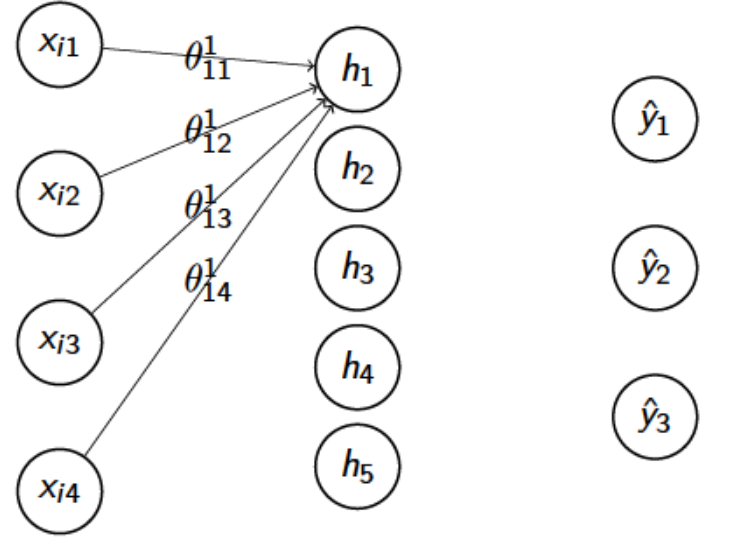

In [0]:
Image('1_neuron.png', width=350, height=220)

Вход в первый нейрон:
$z_1^1 = \theta^1_{11}\cdot x_{i1}+\theta^1_{12}\cdot x_{i2}+\theta^1_{13}\cdot x_{i3}+\theta^1_{14}\cdot x_{i4}+b^1_1.$

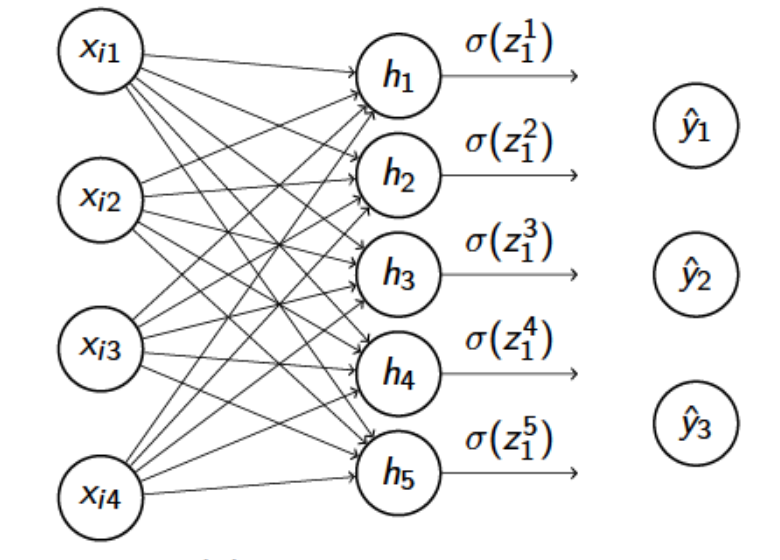

In [0]:
Image('sigmoid.png', width=350, height=220)

Сигмоида - одна из нелинейностей  (функций активации), применяющихся в нейронных сетях. Она принимает в себя выход с  одного из нейронов
$\sigma(x) = \frac{1}{1+e^{-x}}.$

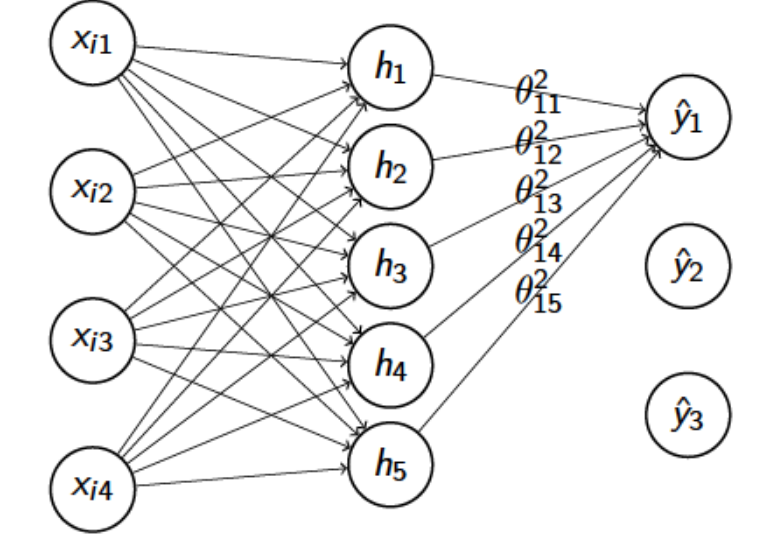

In [0]:
Image('2_layer.png', width=350, height=220)

$a_i = \sigma(z^1_i)$

Тогда вход в $\hat{y}_1$:

$z_1^2 = \theta^2_{11}\cdot a_1 + \theta^2_{12}\cdot a_2 + \theta^2_{13}\cdot a_3 + \theta^2_{14}\cdot a_4+ \theta^2_{15}\cdot a_5+b^2_1,$

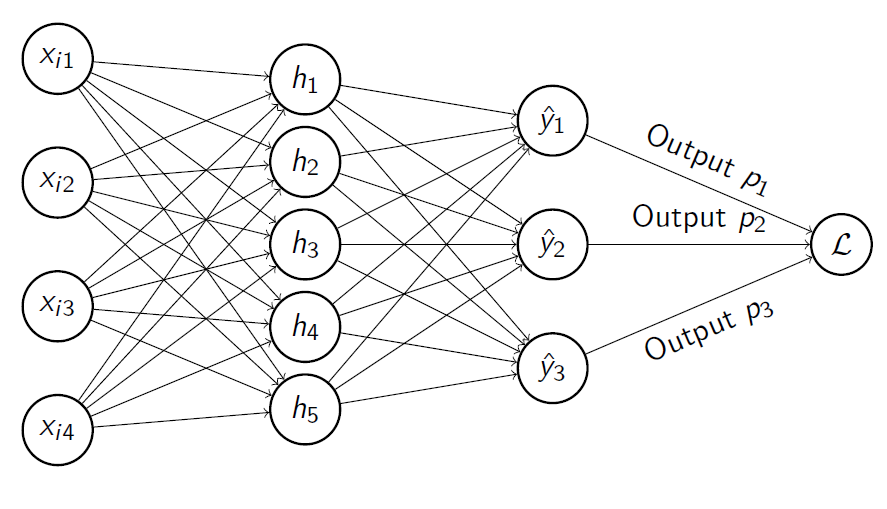

In [0]:
Image('full.png', width=350, height=220)

Более формально нейронную сеть можно представить в виде графа вычислений:

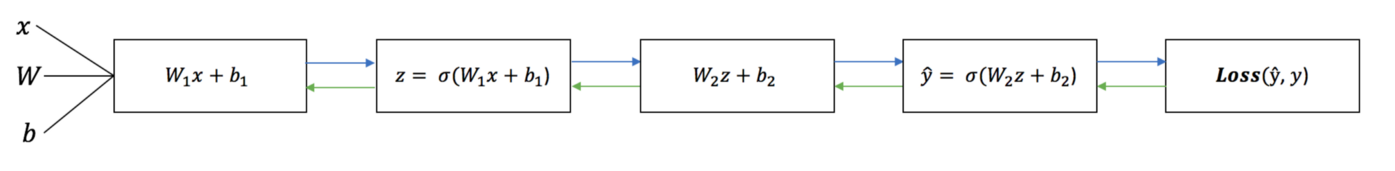

In [0]:
Image('forward_backward.png', width=850, height=100)

## Часть 2. Попробуем построить свою сеть

Построим нейросеть с одним полносвязным скрытым слоем, которая будет брать на вход сэмпл, представленный в виде признаков, а на выходе отдавать вероятность класса. Мы рассмотрим случай бинарной классификации, поэтому в выходном слое нам будет достаточно одного нейрона

Загружаем данные. Классический датасет содержит информацию о длине и ширине лепестка и чашелистика для трех видов ирисов

In [0]:
iris = pd.read_csv('iris.csv')

In [0]:
iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Для нашей тренировочной задачи упростим данные, оставив только два класса: __Virginica__ - 0 и __Versicolor__ - 1. Будем решать задачу бинарной классификации, классифицируя каждый семпл по двум признакам (длина и ширина лепестка)

In [0]:
iris.loc[iris['species']=='virginica','species_num']=0
iris.loc[iris['species']=='versicolor','species_num']=1
iris.loc[iris['species']=='setosa','species_num'] = 2
iris = iris[iris['species_num']!=2]

In [0]:
X = iris[['petal_length', 'petal_width']].values.T #(2,100)
Y = iris[['species_num']].values.T #(1,100)

Визуализируем наши данные в двумерном пространстве признаков, разные цвета соответствуют разным классам

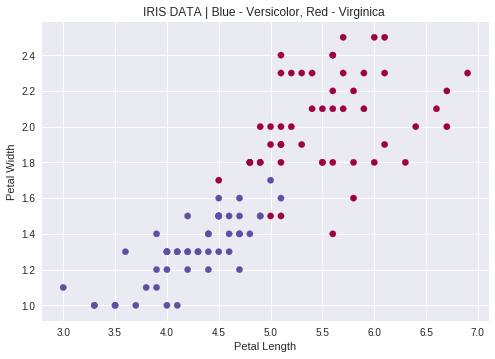

In [0]:
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);
plt.title("IRIS DATA | Blue - Versicolor, Red - Virginica ")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

Случайно инициализируем веса, bias инициализируем нулями

In [0]:
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
       
  
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [0]:
def layer_sizes(X, Y):
    n_x = X.shape[0] 
    n_h = 6
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

Шаг вперед, пропускаем входную последовательность через нейроны сети, запоминая выходы с промежуточных шагов. A2 — полученное предсказание

In [0]:
def forward_propagation(X, parameters):   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1/(1+np.exp(-Z2))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

Насколько мы далеки от правильных ответов? Функция потерь сравнивает предсказания A2 c реальными результатами Y и возвращает оценку ошибки

In [0]:
def compute_cost(A2, Y, parameters):
   
    m = Y.shape[1]
    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    return cost

Шаг назад: обратное распространение ошибки. Хотим получить вектор градиента, состоящий из частных производных по всем из параметров. Вектор указывает направление, в котором функция потерь растет быстрее всего

In [0]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
        
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    
    return grads

Наша задача - минимизация функции потерь, поэтому мы идем в противоположном градиенту напривлении. Длина шага — **learning rate**. Сохраняем обновленные веса. С ними наша сеть будет предсказывать чуть лучше

In [0]:
def update_parameters(parameters, grads, learning_rate=1.2):
# Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

Собираем все шаги в единую сеть, где процесс обучения выполняется циклом длиной в количество эпох:


*  Forward propagation: делаем шаг вперед, пропуская входные данные через нейроны сети.
*  Cчитаем значение функции ошибки (cost/loss function).
*  Back propagation: ищем градиент - направление максимального роста cost function при нынешних параметрах. 
*  Обновляем веса, перемещаясь по функции потерь в обратном градиенту направлении.



In [0]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
                
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    return parameters

Обучим модель за 1000 итераций и за 50000 итераций, в обоих случаях сохраним параметры



In [0]:
parameters_1000 = nn_model(X,Y , n_h = 6, num_iterations = 1000, print_cost=False)
parameters_50000 = nn_model(X,Y , n_h = 6, num_iterations = 50000, print_cost=True)

Cost after iteration 0: 0.693225
Cost after iteration 1000: 0.424292
Cost after iteration 2000: 0.211663
Cost after iteration 3000: 0.123261
Cost after iteration 4000: 0.089087
Cost after iteration 5000: 0.081006
Cost after iteration 6000: 0.076024
Cost after iteration 7000: 0.074890
Cost after iteration 8000: 0.074360
Cost after iteration 9000: 0.073828
Cost after iteration 10000: 0.074361
Cost after iteration 11000: 0.077541
Cost after iteration 12000: 0.088772
Cost after iteration 13000: 0.088687
Cost after iteration 14000: 0.088029
Cost after iteration 15000: 0.086951
Cost after iteration 16000: 0.085786
Cost after iteration 17000: 0.084679
Cost after iteration 18000: 0.083588
Cost after iteration 19000: 0.074982
Cost after iteration 20000: 0.074975
Cost after iteration 21000: 0.078646
Cost after iteration 22000: 0.072847
Cost after iteration 23000: 0.085274
Cost after iteration 24000: 0.073421
Cost after iteration 25000: 0.057336
Cost after iteration 26000: 0.102642
Cost after ite

In [0]:
parameters_1000

{'W1': array([[-0.73141044, -2.89369836],
        [ 0.56087706, -4.57804212],
        [-0.61413975, -1.13668055],
        [-0.21459578,  3.66758731],
        [ 1.04207635, -8.36993525],
        [-0.09082063,  6.15140858]]),
 'W2': array([[ 0.18639226,  0.7308664 , -0.03472296, -0.27995301,  0.90962261,
         -0.73329316]]),
 'b1': array([[ 2.55350781],
        [ 6.71412659],
        [ 0.91551246],
        [-5.33323044],
        [10.35471932],
        [-8.37471096]]),
 'b2': array([[0.7122717]])}

Посмотрим на результаты для двух наборов параметров. Для этого просто сделаем forward_propagation

In [0]:
preds_1000 = forward_propagation(X, parameters_1000)
preds_1000 = preds_1000[0]

In [0]:
preds_50000 = forward_propagation(X, parameters_50000)
preds_50000 = preds_50000[0]

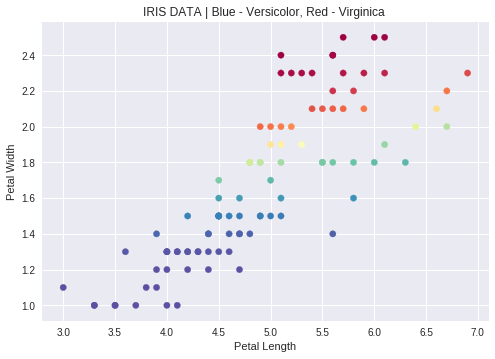

In [0]:
#Make a scatter plot
plt.scatter(X[0, :], X[1, :], c=preds_1000[0,:], s=40, cmap=plt.cm.Spectral);
plt.title("IRIS DATA | Blue - Versicolor, Red - Virginica ")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


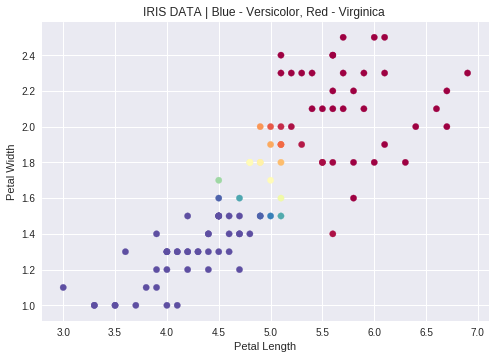

In [0]:
#Make a scatter plot
plt.scatter(X[0, :], X[1, :], c=preds_50000[0,:], s=40, cmap=plt.cm.Spectral);
plt.title("IRIS DATA | Blue - Versicolor, Red - Virginica ")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

## Задание

Попробуем с помощью той же самой сети решить задачу классификации для классического датасета 20 newsgroups. Классы в виде чисел лежат в атрибуте target, а имена классов – в target_names.

In [0]:
from sklearn.datasets import fetch_20newsgroups
from sklearn import metrics
from pprint import pprint
import numpy as np
import pandas as pd

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
pprint(newsgroups_train.target_names)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


Для упрощения задачи оставим любые два класса.

In [0]:
categories = ['', '']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

In [0]:
newsgroups_train.['target'][:10]

### Подготовка данных

Обучающие данные (X_train) необходимо векторизовать, а после превратить получившуюся разреженную матрицу (sparse matrix) с множеством нулей в плотную матрицу (dense matrix). Столбец с класcами (Y_train) нужно преобразовать в матрицу и затем транспонировать ее.  То же самое нужно проделать с тестовыми данными.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

# YOUR CODE HERE 

### Обучение

Необходимо добавить значения параметров. При желании можно использовать grid search для подбора параметров (размер скрытого слоя, количество итераций).

In [0]:
parameters = nn_model(X, Y , n_h =, num_iterations=, print_cost=)

### Тестирование

На данном шаге нужно посмотреть предсказания сети на тестовых данных. Не забудьте их векторизовать!

In [0]:
# YOUR CODE HERE

preds = forward_propagation() # здесь тестовые данные и сохраненные на предыдущем шаге параметры

Оценим качетсво сети по основным метрикам (точность, полнота, f-мера, accuracy) и построим матрицу ошибок.  

В нашем случае предсказания — это вероятность класса 1. Чтобы получить `classification_report`, нужно добавить в архитектуру сети функцию, которая по вероятности будет выдавать класс, или же обработать полученные предсказания соответствующим образом.

In [0]:
# YOUR CODE HERE

print(metrics.classification_report()) # реальные классы и предсказания

In [0]:
import seaborn as sns

m = confusion_matrix() # реальные классы и предсказания

plt.figure(figsize = (10,10))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, cmap=plt.cm.Spectral)
plt.title("")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Также оценим качество с помощью AUC-ROC — популярной метрики для бинарной классификации. 

**ROC-кривая** (англ. *receiver operating characteristic*, рабочая характеристика приёмника) — график, позволяющий оценить качество бинарной классификации. Он отображает соотношение  *true positive rate, (TPR)* и  *false positive rate (FPR)* при варьировании порога решающего правила. 


Количественную интерпретацию ROC даёт показатель **AUC** (англ. *area under ROC curve*, площадь под ROC-кривой) — площадь, ограниченная ROC-кривой и осью доли FP. Чем выше показатель AUC, тем качественнее классификатор, при этом значение 0,5 демонстрирует непригодность выбранного метода классификации (соответствует случайному гаданию). 

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style  
style.use('ggplot') 

fpr, tpr, threshold = metrics.roc_curve() # реальные классы и предсказания
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--') # внешний вид можно изменить по своему вкусу
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()